# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG)

### Aluno: Victor Hugo Negrisoli

### Modelos Estatísticos - Correlação, Regressão Linear Simples e Múltipla

#### Importando as bibliotecas necessárias

In [232]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import Image

#### Função para configurar os plots da Matplotlib

In [215]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [216]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

#### Importando e transformando os dados

In [16]:
dados = pd.read_csv('dados/06 - correl_ex1.csv', encoding='ansi')

In [17]:
dados.head()

,Semana,Nº de comerciais,Volume de vendas (100 reais)
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54


In [26]:
dados = dados.rename(columns = {
    'Semana': 'semana',
    'Nº de comerciais': 'qtd_comerciais', 
    'Volume de vendas (100 reais)': 'vol_vendas'
})

dados

,semana,qtd_comerciais,vol_vendas
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54
5,6,1,38
6,7,5,63
7,8,3,48
8,9,4,59
9,10,2,46


#### Rápida análise exploratória sobre os dados

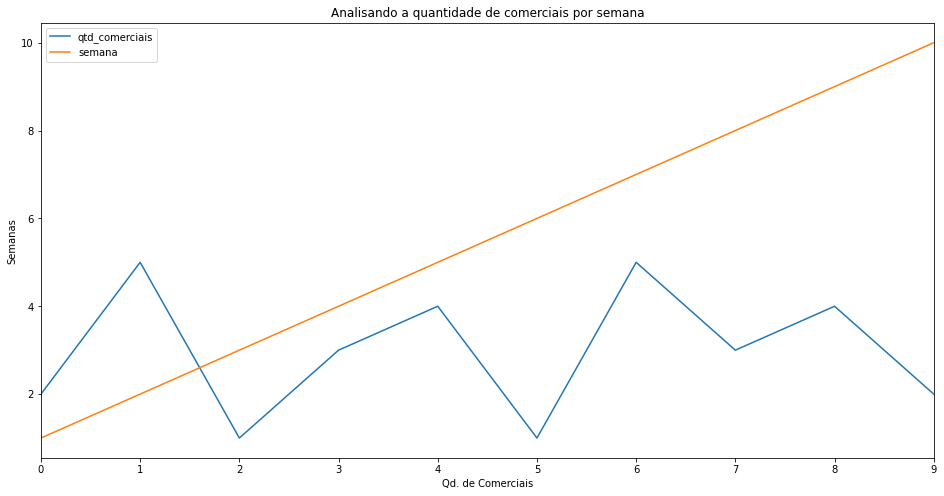

In [217]:
dados[['qtd_comerciais', 'semana']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais por semana', 'Qd. de Comerciais', "Semanas")

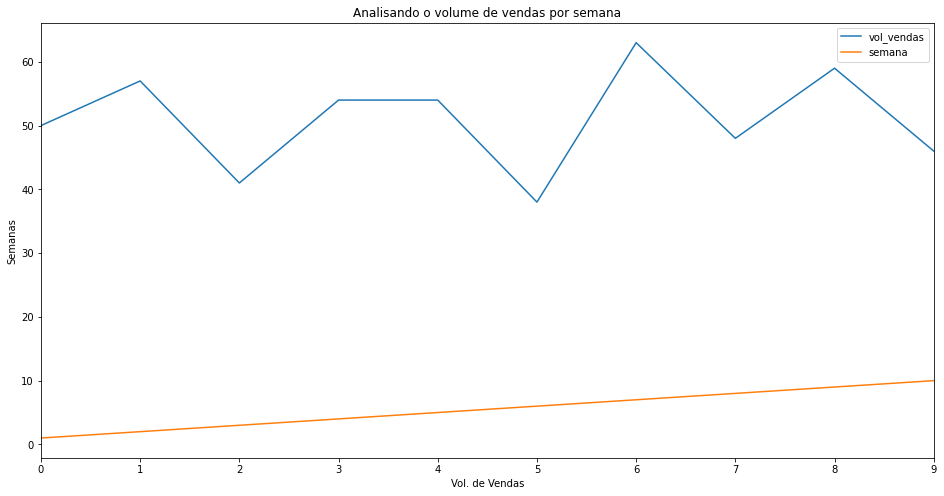

In [218]:
dados[['vol_vendas', 'semana']].plot(kind='line')
configurar_plot('Analisando o volume de vendas por semana', 'Vol. de Vendas', "Semanas")

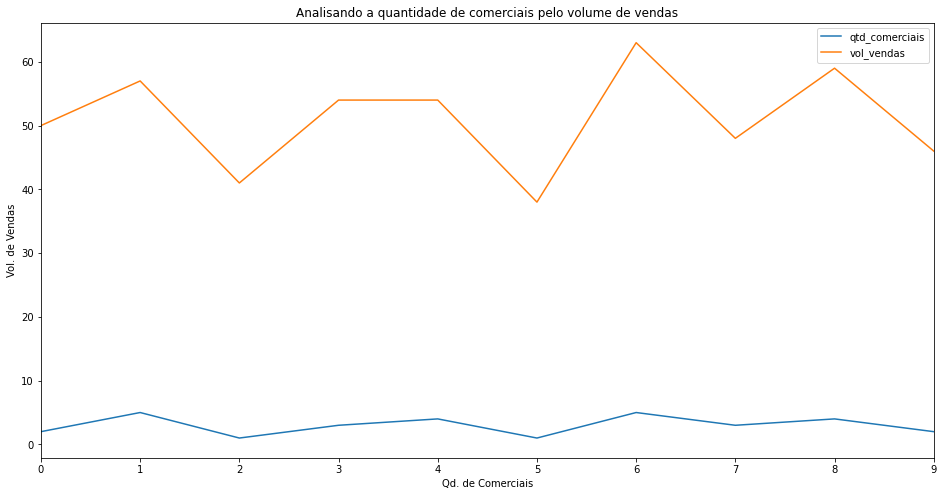

In [219]:
dados[['qtd_comerciais', 'vol_vendas']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais pelo volume de vendas', 'Qd. de Comerciais', 'Vol. de Vendas')

#### Implementando a correlação de pearson via fórmula (sem uso da SciPy)

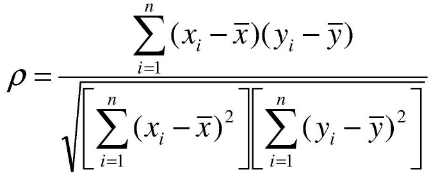

In [220]:
Image(filename = 'imgs/correlacao_pearson.png', width=300, height=300)

In [165]:
def raiz(v):
    return math.sqrt(v)

n = dados['semana'].size
x = dados['semana']
y = dados['vol_vendas']

In [166]:
def realizar_correlacao(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    return sum((x - x_mean) * (y - y_mean)) / raiz( sum(pow(x - x_mean, 2)) * sum( pow(y - y_mean, 2) ))

In [155]:
correlacao = realizar_correlacao(x, y)
correlacao

0.05553235050940941

#### Utilizando a função de pearsonr da SciPy

In [156]:
correlacao_pearson = pearsonr(dados['semana'], dados['vol_vendas'])

coeficiente = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

In [157]:
coeficiente

0.055532350509409426

In [142]:
valor_p

0.878896906536397

#### Agora, vamos refazer os testes utilizando a variável qtd_comerciais como y

In [203]:
y = dados['qtd_comerciais']

correlacao_implementada = realizar_correlacao(x, y)
correlacao_pearson = pearsonr(x, y)
coeficiente_scipy = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

print(correlacao_implementada)
print(correlacao_scipy)
print(valor_p)

1.0
0.9304905807411791
0.0


#### Como vimos, todas possuem baixa correlação. Vamos verificar agora a correlação entre a quantidade de comerciais e o volume de vendas

In [204]:
x = dados['qtd_comerciais']
y = dados['vol_vendas']

correlacao_implementada = realizar_correlacao(x, y)
correlacao_pearson = pearsonr(x, y)
coeficiente_scipy = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

print(correlacao_implementada)
print(correlacao_scipy)
print(valor_p)

0.9304905807411791
0.9304905807411791
9.385534016441817e-05


Podemos visualizar que entre essas duas variáveis temos um alto grau de correlação, pois seus valores são próximos de 1.

### Verificando a dispersão das variáveis

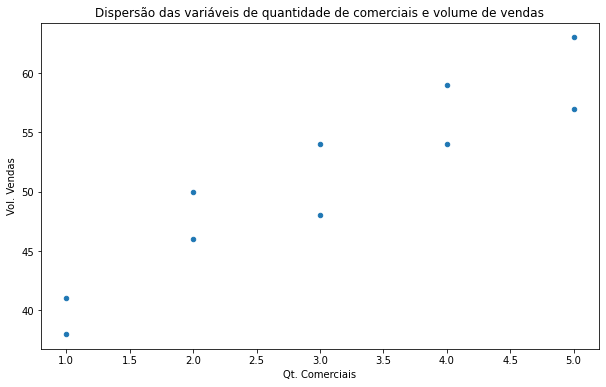

In [222]:
dados.plot.scatter('qtd_comerciais', 'vol_vendas')

configurar_plot_com_dimensoes(
    'Dispersão das variáveis de quantidade de comerciais e volume de vendas', 
    'Qt. Comerciais', 
    'Vol. Vendas',
    10,
    6
)

### Regressão Linear Simples

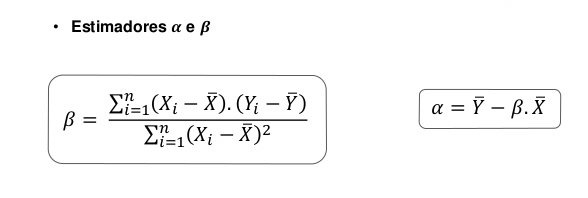

In [223]:
Image(filename = 'imgs/regressao_linear_simples.png', width=700, height=400)

In [262]:
x = dados['qtd_comerciais']
y = dados['vol_vendas']

x_mean = x.mean()
y_mean = y.mean()

beta = sum((x - x_mean) * (y - y_mean)) / sum(pow(x - x_mean, 2))

alfa = y_mean - beta * x_mean

dados['alfa'] = 0.33 + alfa * x
dados

,semana,qtd_comerciais,vol_vendas,alfa
0,1,2,50,72.63
1,2,5,57,181.08
2,3,1,41,36.48
3,4,3,54,108.78
4,5,4,54,144.93
5,6,1,38,36.48
6,7,5,63,181.08
7,8,3,48,108.78
8,9,4,59,144.93
9,10,2,46,72.63


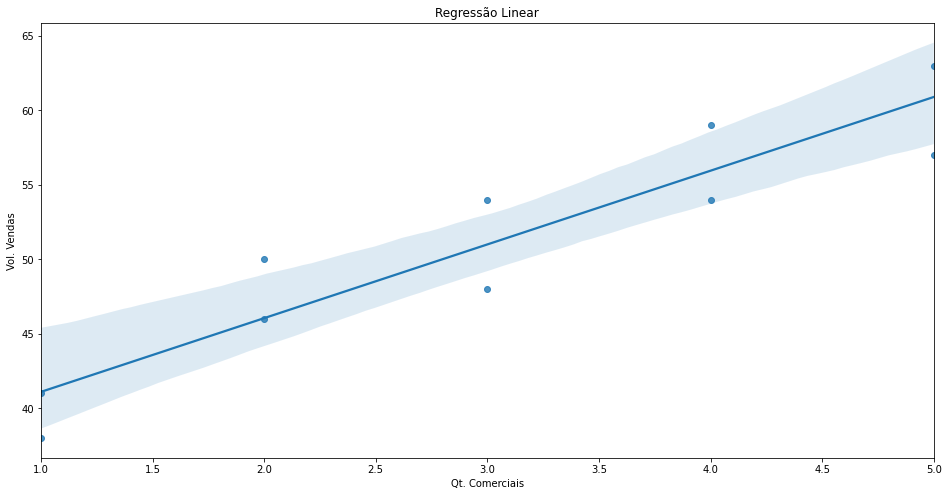

In [236]:
sns.regplot(x = x, y = y, data = dados)

configurar_plot('Regressão Linear', 'Qt. Comerciais', 'Vol. Vendas')

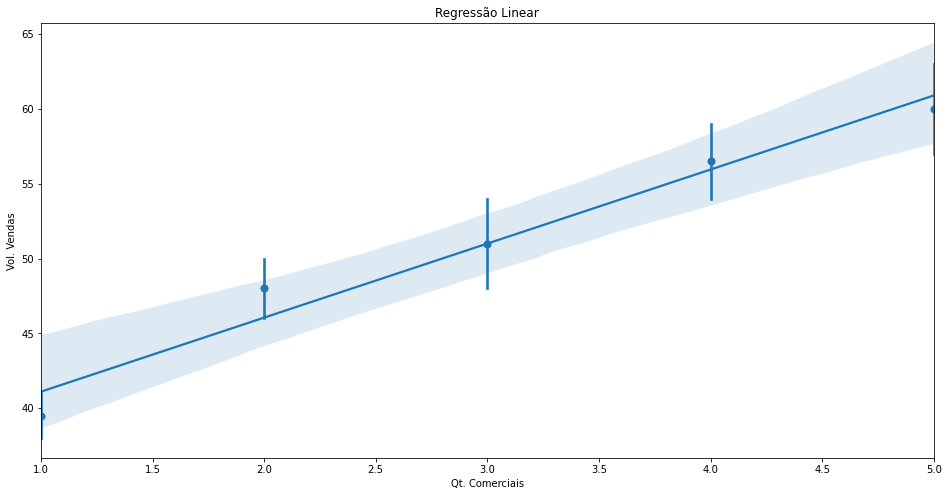

In [235]:
sns.regplot(x = x, y = y, data = dados, x_estimator=np.mean)

configurar_plot('Regressão Linear', 'Qt. Comerciais', 'Vol. Vendas')

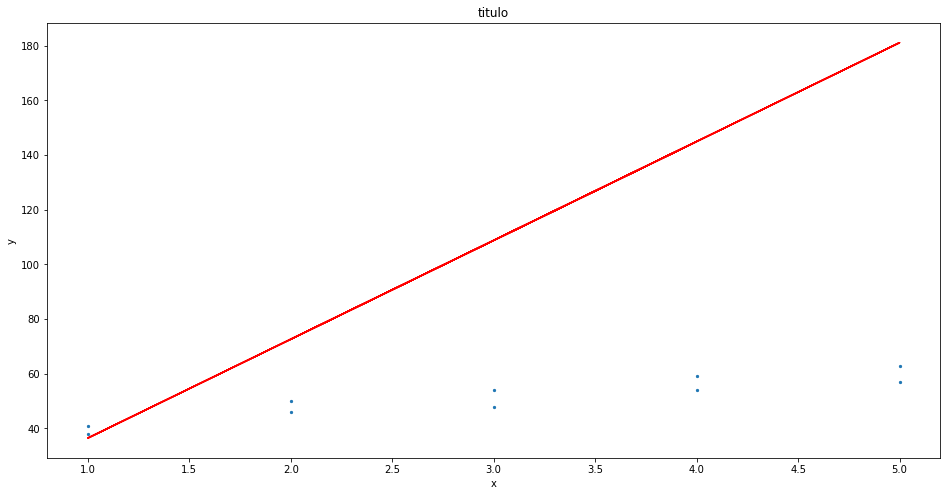

In [273]:
plt.scatter(x, y, s = 5)
plt.plot(x, 0.33 + alfa * x, color='r')
configurar_plot('titulo', 'x', 'y')